# 5分だけ勉強会向け資料

## 確率論のよく知られた定理を実験により確かめる

### 大数の法則

ある事象が発生する確率が $p$ であるとする。試行を $m$ 回行ったとき、その事象の起こる回数が $k$ 回であるとすれば、比率 $k/m$ は試行回数が大きくなるにつれて一定の値 $p$ に近づく：これを**大数の法則**と呼ぶ。

例：イカサマのないコイン投げ（表が出る確率 = 0.5、裏が出る確率 = 0.5）を何回も試行すると、回数が多くなるにつれて表が出る確率は 0.5 に近づく。以下のシミュレーションでは、2000回コインを投げるとする：

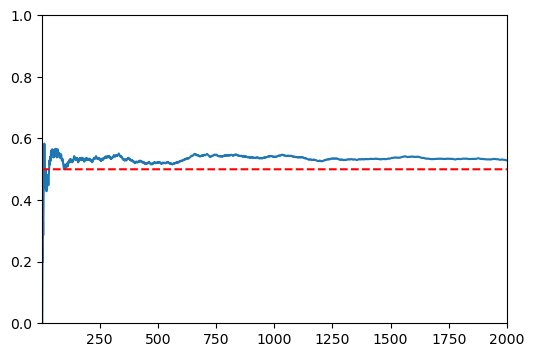

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fac679e94c0>

In [1]:
using PyPlot

number = 2000               # コインを投げる回数
f = zeros(Float64, number)  # 各回の k/m の値
p = 0.5                     # 表が出る確率
k = 0                       # 表が出た回数

# グラフィックの準備
fig = PyPlot.figure(figsize=(6.0, 4.0))
ax = fig.add_subplot()
ax.set_xlim(1, number)
ax.set_ylim(0, 1)

for i = 1:number
    # 発生させた乱数が p より小さい場合は回数を 1 つ加算する
    if p > rand()
        k += 1
    end
    f[i] = k / i
end

ax.plot(1:number, f)

# 基準となる線の描画
x = 1:number
pi_line = fill(p, number, 1)
ax.plot(x, pi_line, "--", color="red")

## 中心極限定理

中心極限定理は、「多くの場合、母集団の分布がどんな分布であっても、その誤差は標本の大きさを大きくしたとき近似的に正規分布に従う。」というもの。

言い換えると・・・
同一の分布に従う $n$ 個の乱数があったとする。もとの分布の平均値（期待値）を $\mu$ 、分散を $\sigma^2$ とすると、もとの分布が何であろうと、 $n$ の値が大きくなるにつれて、平均が $n\mu$ 、分散が $n\mu^2$ の正規分布に近づく。これを**中心極限定理**と言う。

以下のシミュレーションでは、「区間　$[0, 1)$ の一様乱数 $n$ 個の合計 $x$ の分布は、平均値が $n/2$, 分散が $n/12$ の正規分布に近づく。」ということを確かめている。

（平均値と分散の計算）
区間 $[0,1)$ の連続一様乱数の確率密度関数は
$$
    f(x) = 
    \begin{cases}
        0   &   x < 0  \\
        1   &   0 \leqq x \leqq 1 \\
        0   &   x > 1
    \end{cases}
$$
なので、平均値 $\mu$、分散 $\sigma^2$ は
$$
    平均値：\mu = \int_{-\infty}^{\infty}x\cdot f(x)dx = \int_{0}^{1}xdx = \frac{1}{2} \\
    分散：\sigma^2 = \int_{-\infty}^{\infty}(x-\mu)^2 f(x)dx = \int_{0}^{1}\left(x - \frac{1}{2}\right)^2dx = \frac{1}{12} 
$$

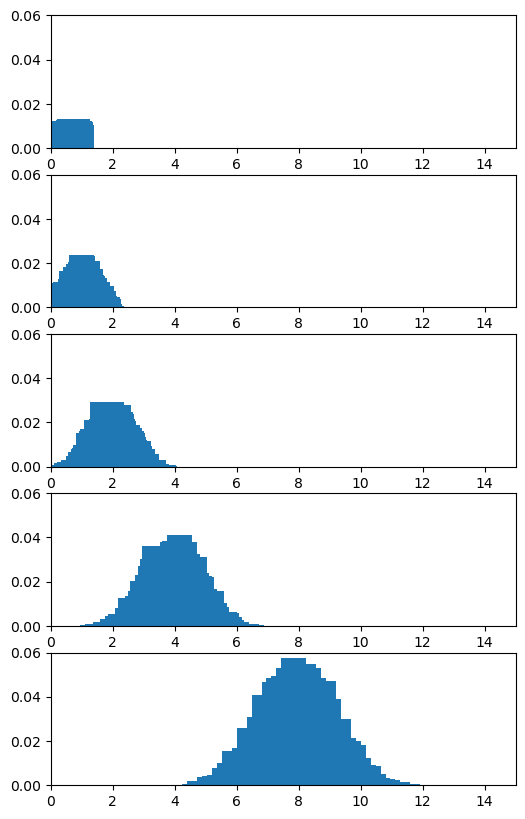

In [2]:
using PyPlot

number = 5000          # 試行回数
size = 100             # ヒストグラムのサイズ
f = zeros(Int, size)   # ヒストグラム

# 発生させた乱数の合計値を返す
function central(n::Int)::Float64
    x = 0.0
    for k = 1:n
        x += rand()
    end
    
    return x
end

# 平均値（期待値）の分布を返す
function experience(n::Int)::Array{Int, 1}
    f = zeros(Int, size)
    for j = 1:number
        x = central(n)
        u = Int(ceil(x * size / n))
        f[u] += 1
    end
    
    return f
end

fig = PyPlot.figure(figsize=(6.0, 10.0))

n = 1
# n = 1, 2, 4, 8, 16 で試行する
for i = 1:5
    f = zeros(Int, size)
    for j = 1:number
        u = Int(ceil(central(n) * size / n))
        f[u] += 1
    end
    ax = fig.add_subplot(5, 1, i)
    x = range(0.0, step=(1.0/size*n), length=size)
    ax.bar(x, f / number)
    ax.set_xlim(0, 15)
    ax.set_ylim(0, 0.06)
    
    n *= 2
end

# 円周率を求める

## ビュフォンの針

[毎日針を5本投げて円周率を計算するbot](https://twitter.com/buffon_needle)がやってること。平行線が引かれた地面にその間隔と同じ長さの針を $N$ 回投げ、平行線と $M$ 回交わる時 $\pi≒ 2N/M$ となる。

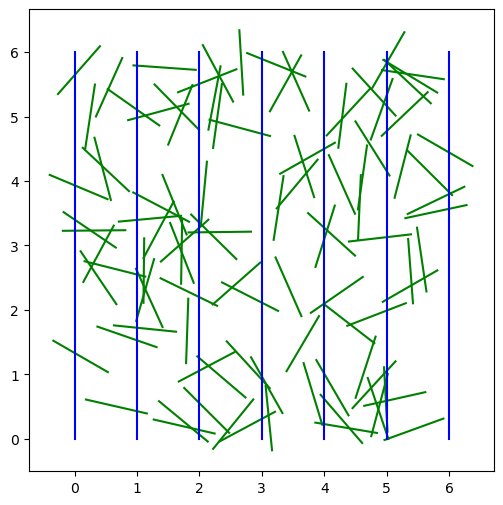

π =   3.333333

In [8]:
using Random
using PyPlot
using Printf

number = 100
x_max = 6
y_max = 6
n1 = 0

fig = PyPlot.figure(figsize=(6.0, 6.0))
ax = fig.add_subplot()

for j = 1:number
    x0 = x_max * rand()
    y0 = y_max * rand()
    θ = 2π * rand()
    x1 = x0 + cos(θ) / 2.0
    y1 = y0 + sin(θ) / 2.0
    x2 = x0 - cos(θ) / 2.0
    y2 = y0 - sin(θ) / 2.0
    x = [x1, x2]
    y = [y1, y2]
    
    ax.plot(x, y, color="green")
    
    if Int(floor(x1)) != Int(floor(x2))
        n1 += 1
    end
end

for i = 0:x_max
    x = [i, i]
    y = [0, y_max]
    ax.plot(x, y, color="blue")
end

@printf "π = %10f" number/n1*2.0

## モンテカルロ法で数値積分をして円周率を求める

正方形の領域を、雨の降る中にさらしたとする。雨滴は均一に、ランダムに降りそそぐので、 1/4 円の内側も、残りの部分もぬらす。1/4 円の内側に落ちる雨滴の数と、正方形の雨滴の数の比は、大数の法則により面積の比に近づくはず：

$$
    \frac{1/4 円の内側部分の雨滴の数}{正方形の雨滴の数} \rightarrow  \frac{1/4 円の面積}{正方形の面積} 
$$ 

となる。

右辺は、$\pi/4$ なので、もし雨滴の数を数えることができれば、

$$
    \pi \approx \frac{1/4 円の部分の雨滴の数}{全体の雨滴の数}\times 4
$$

として $\pi$ が計算できるはず。

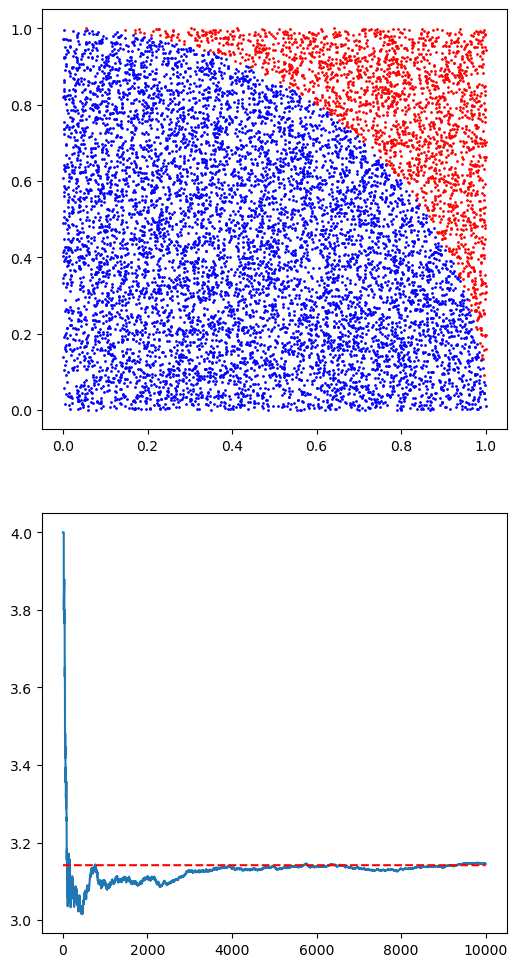

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fac527ae940>

In [4]:
using Random
using PyPlot
using Printf

number = 10000 # 雨粒を落とす数
n1 = 0
p = zeros(Float64, number)
pi_line = fill(π, number, 1)

fig = PyPlot.figure(figsize=(6.0, 12.0))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for i = 1:number
    x0 = rand()
    y0 = rand()

    if (x0^2 + y0^2 < 1.0)
        n1 +=1
        ax1.scatter(x0, y0, marker="o", s=1, color="blue")
    else
        ax1.scatter(x0, y0, marker="o", s=1, color="red")
    end
    
    pi = n1 / i * 4
    p[i] = pi
end

# πの計算値を描画
x = 1:number
ax2.plot(x, p)
ax2.plot(x, pi_line, "--", color="red")

# ランダムウォークと応用

## 2次元のランダムウォーク

平面上をブラウン運動する粒子の動きをシミュレーションする。粒子の次の位置は現時点の位置から $0$ から $2\pi$ のいちに一様に分布すると考えられる。

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig6-2-11.jpg)

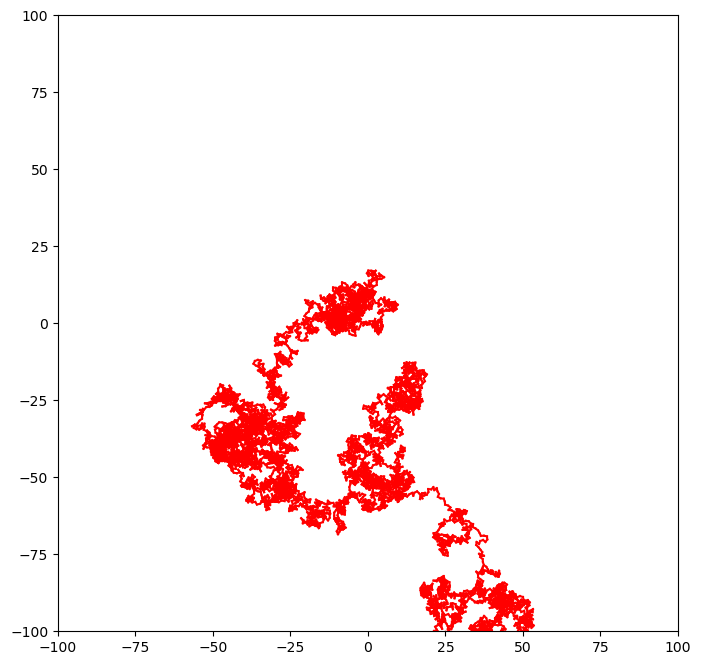

In [1]:
using Random
using PyPlot

t_end = 10000
x0 = 0.0
y0 = 0.0

fig = PyPlot.figure(figsize=(8.0, 8.0))
ax = fig.add_subplot()
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)

for t = 1:t_end
    θ = 2.0π * rand()
    x1 = x0 + cos(θ)
    y1 = y0 + sin(θ)
    x = [x0, x1]
    y = [y0, y1]

    ax.plot(x, y, color="red")
    
    x0 = x1
    y0 = y1
end

### 拡散のシミュレーション

「拡散過程」とは、たくさんの粒子を一ケ所に集めて、ブラウン運動をさせると、粒子はどんどん広がって、ついには、一様にひろがってしまう、という過程。

[シミュレーションのソースコード](./src/spread_simulation/main.jl)

![シミュレーションの結果：粒子の運動](./src/spread_simulation/result_animation.png)

### ホコリの動きのシミュレーション

周囲を壁で覆ってみる。また、中心部では速く、周辺部では遅く動くようにしてみる。この状態では、部屋の中のホコリの動きをシミュレーションしていることとなる（部屋の隅は風がない、部屋の中心部は人が通ったり風が通ったりしてホコリが動く）。

初期条件として、粒子を一様分布させる。
。粒子の動き方を単位時間あたりに進む長さを $l$ としたとき、
$$
    l = \sqrt{2}\cdot MAX -\sqrt{x_i^2 + y_i^2}\cdot
$$
とする。ただし、$MAX$ は壁までの距離、$x_i, y_i$ は粒子 $i$ の位置とする。すなわち、中心部では最速スピード $l = \sqrt{2}\cdot MAX$ で動き、中心部から最も隅の $x_i^2 + y_i^2 = \sqrt{2}\cdot MAX$ のとき、停止状態となる。

また、単位時間後における位置を計算した結果、その値が $MAX$ を超えた場合、図のように、壁のところで、完全反射するものとする。

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig6-4-1.jpg)


[シミュレーションのソースコード](./src/dust_simulation/main.jl)

- 初期状態（$t=0$）
    ![](./src/dust_simulation/figure.0.png)
- $t=100$
    ![](./src/dust_simulation/figure.100.png)
- $t=1999$
    ![](./src/dust_simulation/figure.1999.png)

## 信号の分離

### 同期加算による信号の分離

信号よりも雑音が大きいという悪条件の中で信号を取り出す方法。信号が繰り返し発せられることを知っているものとする。下図のように、信号を時系列上で同意地にして加算することで、雑音の影響を少なくすることが出来る。

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig7-4-1.jpg)

### 原理

中心極限定理により、いかなる分布の乱数も、 $m$ 回加算した後の分布を見ると、分散が $m\sigma^2$（$\sigma^2$: もとの乱数の分散）の正規分布に近づく。すなわち、標準偏差は $\sqrt{m}\sigma$ になる。

$m$ 回加算した後に加算回数で割る（=平均を取る）と、標準偏差は、

$$
    \frac{\sqrt{m}\sigma}{m} = \frac{\sigma}{\sqrt{m}}
$$

となる。ガウス雑音の平均振幅は標準偏差で表されるので、ガウス雑音を次々 $m$ 回加算して平均をとると、その大きさは $1/\sqrt{m}$ になる。一方、信号の方は、タイミングを合わせて（同期して）加算されるので、平均振幅は変わらない。よって、信号と雑音の比（=「S/N比」）は加算回数に従って改善されていく。

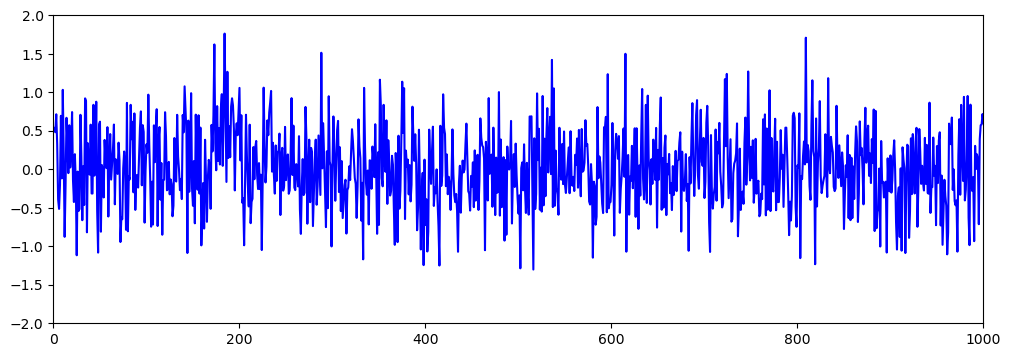

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fac3c669430>

In [8]:
using PyPlot

x0 = 0.5     # 信号のピーク値
w = 0.3      # 信号の幅
σ = 0.5      # 雑音の標準偏差
t_end = 10.0 # シミュレーションの終了時刻
Δt = 0.01    # シミュレーションの刻み
n_end = 0    # 加算回数の最大

# パルス信号を返却する
function signal(t::Float64, peak::Float64, width::Float64)::Float64
    t0 = 1.7 # パルス開始時刻
    
    if t0 <= t <= (t0 + width)
        return peak
    else
        return 0.0
    end
end

# ノイズ（ガウス雑音）を発生させる
function noise(sd::Float64)::Float64
    xw = 0.0
    
    for i = 1:12
        xw += rand()
    end
    
    return (sd * (xw - 6.0))
end

function main()
    m = Int(t_end / Δt)
    mem = zeros(Float64, m)
    for j = 0:n_end
        for i = 1:m
            x = noise(σ) + signal(i * Δt, x0, w)
            mem[i] = (mem[i] * j + x) / (j + 1)
        end
    end
    
    fig = PyPlot.figure(figsize=(12.0, 4.0))
    ax = fig.add_subplot()
    ax.set_xlim(0, m)
    ax.set_ylim(-2.0, 2.0)
    x = 1:m
    ax.plot(x, mem, color="blue")
end

main()